In [1]:
# x = uniform(0,10)
# estimate E(x) (the average)
# -> number of experiments = N
# -> confidence levels = L (E[0,1])

# define proprerty all the input parameters

# the y axis is the accuracy
# the x axis is the N

# the y axis is the accuracy
# the x axis is L (width of interval)

# the y axis is the confidence interval (two curves for the upper bound and the lower bound)
# the x axis is N

# the y axis is the conf
# the x axis is L

In [2]:
import numpy as np

# X = np.random.uniform(0,10,1000)

X = np.array([12,11,14,15,10,16])

mean = X.mean()
std = X.std(ddof=1)
var = X.var(ddof=1)

se = std / (len(X)**(1/2))

mean,std,var,se

(13.0, 2.3664319132398464, 5.6, 0.966091783079296)

In [3]:
from scipy.stats import t

interval = t.interval(.98, len(X)-1, loc=mean, scale=se)
MOE = interval[1] - interval[0]
re = (MOE / (2 * abs(mean)))
acc = 1 - re

print(f'Relative error: {re*100:.2f}%\nAccuracy: {acc*100:.2f}%')

Relative error: 25.01%
Accuracy: 74.99%


In [4]:
def calculate_confidence_interval(X,C):
    mean = X.mean()
    std = X.std(ddof=1)
    se = std / (len(X)**(1/2)) # this is the standard error
    
    interval = t.interval(confidence = C, # confidence level
                          df = len(X)-1, # degree of freedom
                          loc = mean, # center of the distribution
                          scale = se # spread of the distribution (we use the standard error as we use the extimate of the mean and not the real mean)
                          )
    
    MOE = interval[1] - interval[0]
    re = (MOE / (2 * abs(mean))) # this is the relative error
    
    return interval,re

X = np.array([12,11,14,15,10,16])
interval,re = calculate_confidence_interval(X,C=.98)
print(f'Relative error: {re*100:.2f}%\nAccuracy: {(1 - re)*100:.2f}%')


Relative error: 25.01%
Accuracy: 74.99%


In [5]:
import pandas as pd

Ns = np.arange(100,100_000,1000)
Cs = np.arange(.85,.99,.02)

results, intervals = [],[]
for N in Ns:
    for C in Cs:
        X = np.random.uniform(0,10,N)
        interval,re = calculate_confidence_interval(X,C=C)
        results.append((N,C,1 - re))
        intervals.append((N,C,interval[0],interval[1]))

In [6]:
results = np.empty((len(Ns) * len(Cs), 5), dtype=np.float64)

i = 0
for N in Ns:
    for C in Cs:
        X = np.random.uniform(0, 10, N)
        interval, re = calculate_confidence_interval(X, C=C)
        results[i] = [N, C, 1 - re, interval[0], interval[1]]
        i += 1

In [7]:
N = results[:,0]
np.random.choice(N,1)

array([76100.])

In [29]:
C = results[:,1]
unique_c = np.unique(C)
np.isclose(.99, unique_c)

array([False, False, False, False, False, False, False,  True])

In [35]:
98100 in N

True

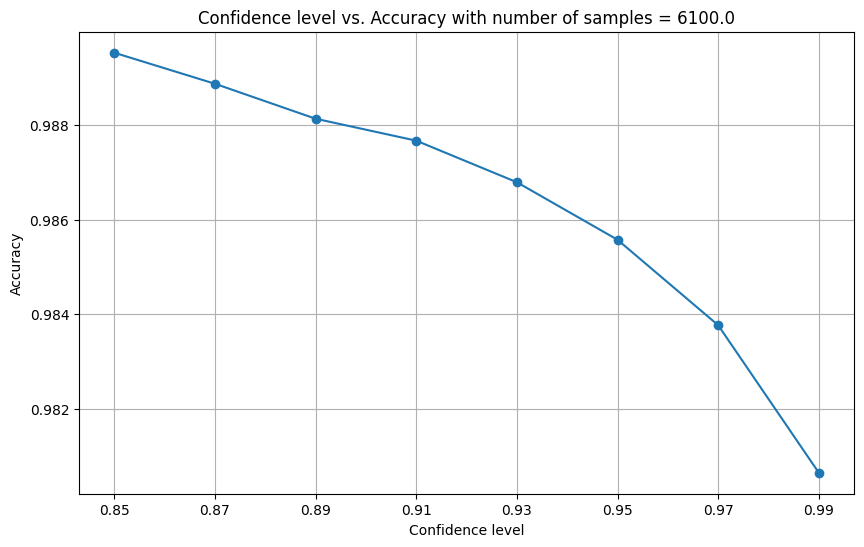

In [8]:
import matplotlib.pyplot as plt

N = results[:,0]
C = results[:,1]
accs = results[:,2]

plt.figure(figsize=(10, 6))
n_sample = np.random.choice(N,1)[0]
mask = N == n_sample
plt.plot(C[mask], accs[mask], linestyle='-', marker='o')
plt.title(f'Confidence level vs. Accuracy with number of samples = {n_sample}')
plt.xlabel('Confidence level')
plt.xticks(np.unique(C))
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



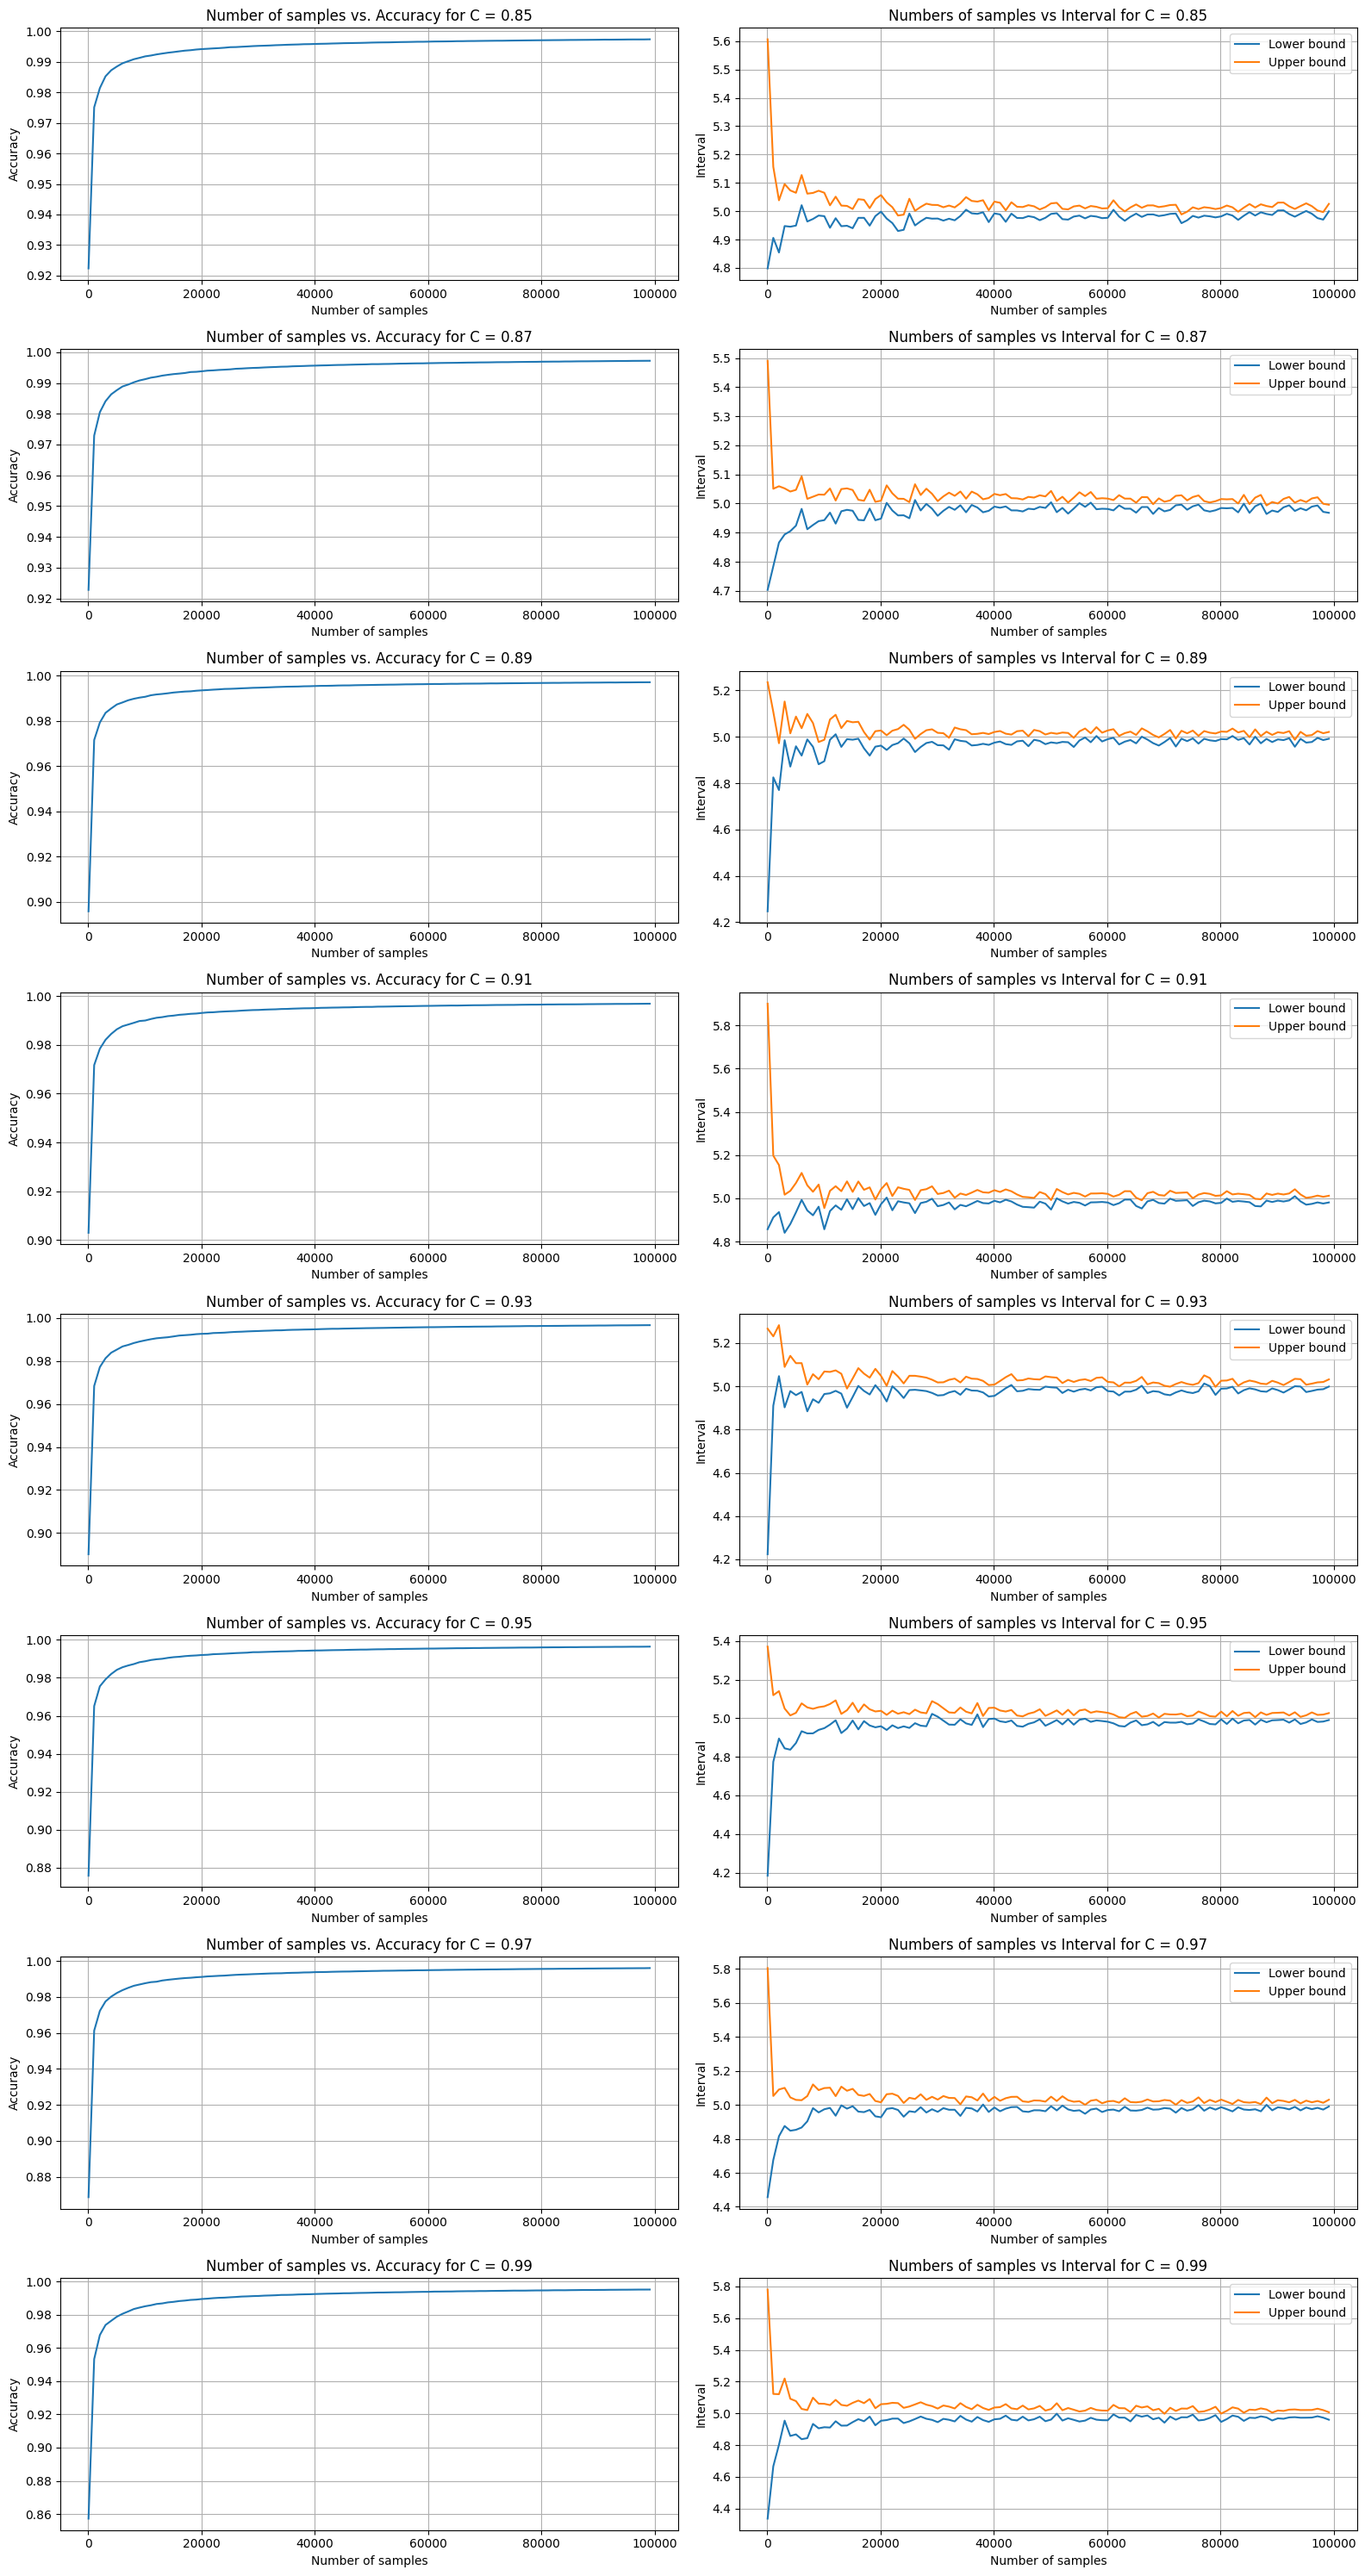

In [9]:
import matplotlib.pyplot as plt

N = results[:,0]
C = results[:,1]
accs = results[:,2]
starts = results[:,3]
ends = results[:,4]

unique_c = np.unique(C)

num_rows = len(unique_c)
num_cols = 2

fig, axes = plt.subplots(num_rows,num_cols, figsize=(16,30))

for i,c_value in enumerate(unique_c):
    mask = C == c_value
    
    axes[i][0].plot(N[mask], accs[mask], linestyle='-')
    axes[i][0].set_title(f'Number of samples vs. Accuracy for C = {c_value:.2}')
    axes[i][0].set_xlabel('Number of samples')
    axes[i][0].set_ylabel('Accuracy')
    axes[i][0].grid(True)
    
    axes[i][1].plot(N[mask], starts[mask], label=f'Lower bound')
    axes[i][1].plot(N[mask], ends[mask], label=f'Upper bound')
    axes[i][1].set_title(f'Numbers of samples vs Interval for C = {c_value:.2}')
    axes[i][1].set_xlabel('Number of samples')
    axes[i][1].set_ylabel('Interval')
    axes[i][1].legend(loc='upper right')
    axes[i][1].grid(True)

plt.tight_layout()
plt.show()

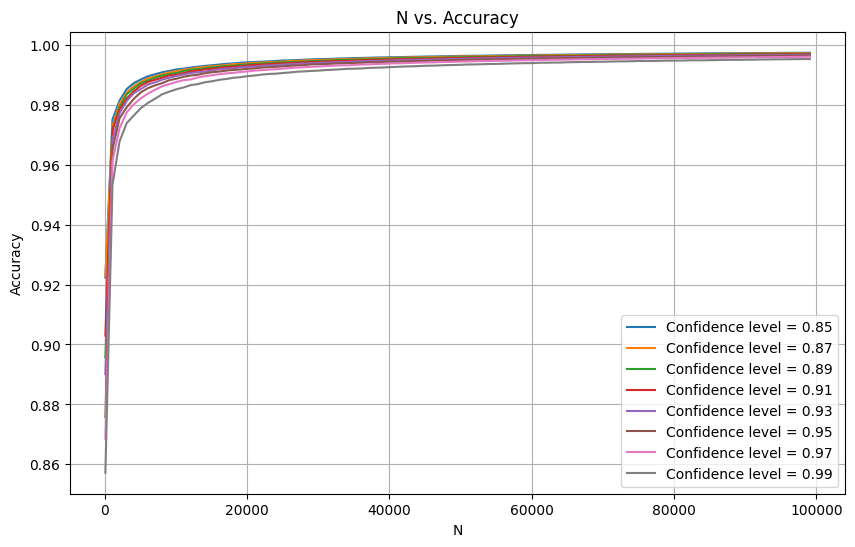

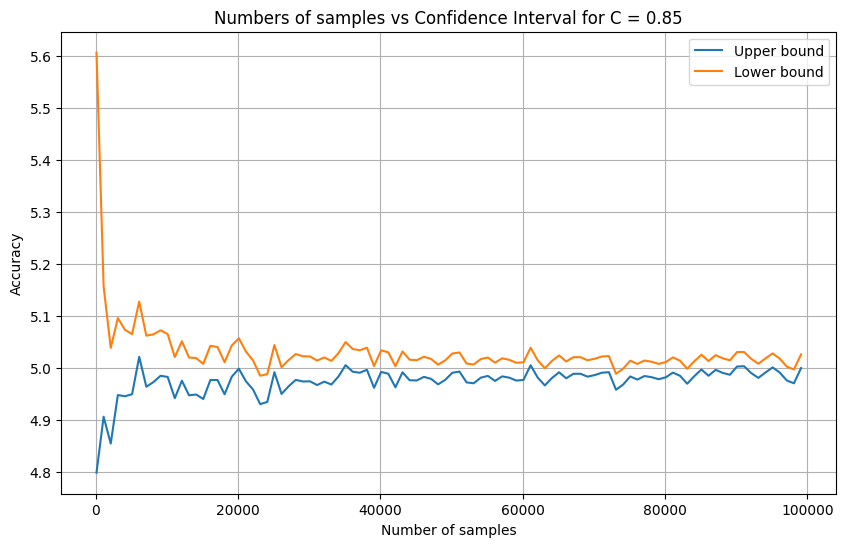

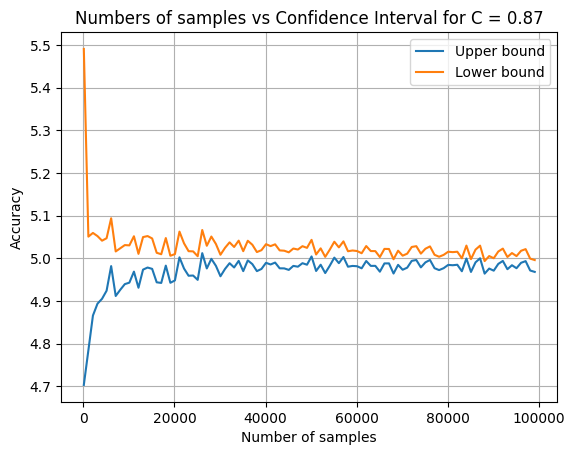

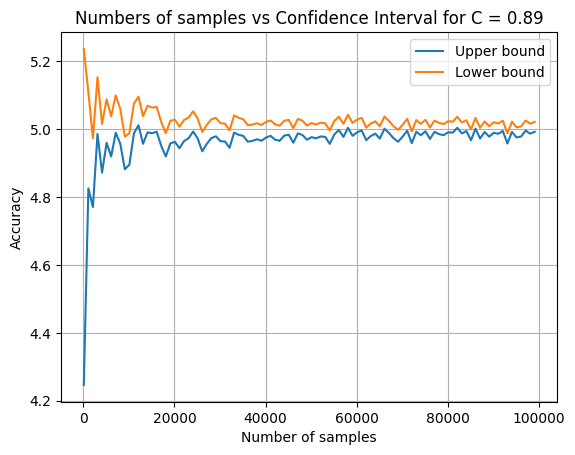

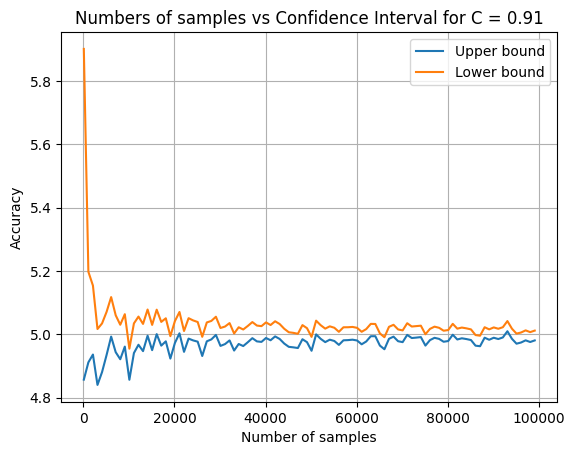

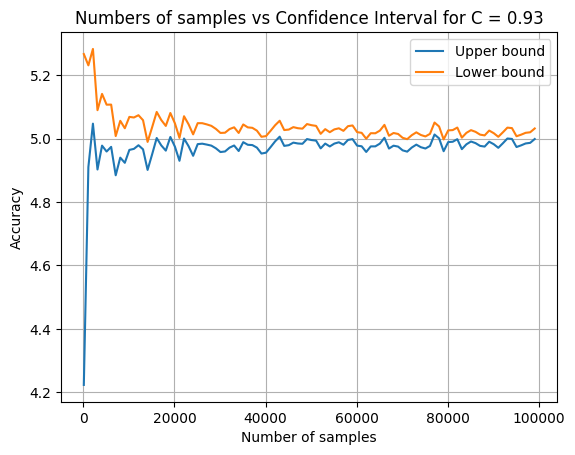

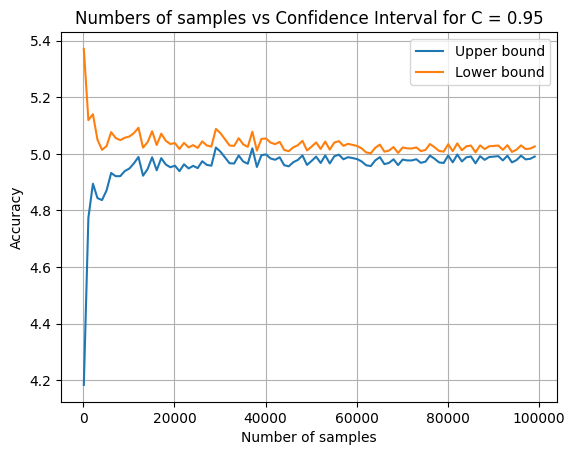

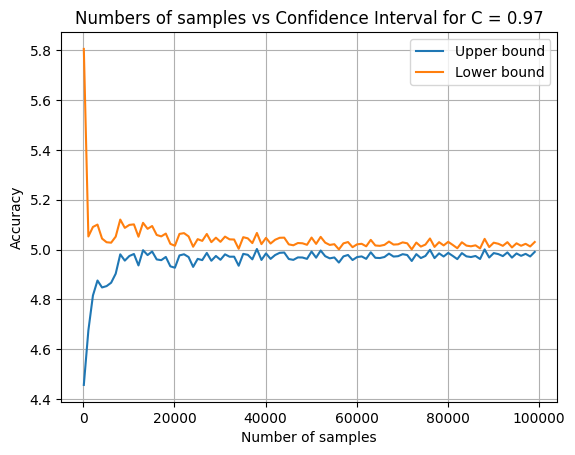

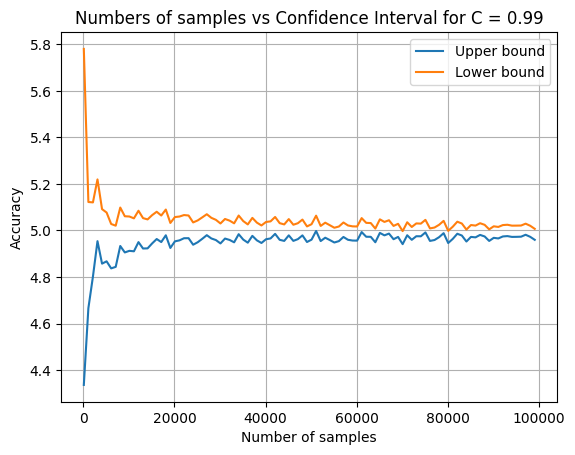

In [10]:

# Create a line plot for "N" vs. "Accuracy" without data points
plt.figure(figsize=(10, 6))
for c_value in unique_c:
    mask = C == c_value
    plt.plot(N[mask], accs[mask], linestyle='-', label=f'Confidence level = {c_value:.2}')
plt.title('N vs. Accuracy')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Create a line plot for each group
plt.figure(figsize=(10, 6))
for c_value in unique_c:
    mask = C == c_value
    plt.plot(N[mask], starts[mask], label=f'Upper bound')
    plt.plot(N[mask], ends[mask], label=f'Lower bound')
    plt.title(f'Numbers of samples vs Confidence Interval for C = {c_value:.2}')
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [11]:
grouped_2 = intervals_df.groupby('C')

# Create a line plot for each group
plt.figure(figsize=(10, 6))
for name, group in grouped_2:
    plt.plot(group['N'], group['Start'], label=f'Upper bound C = {name:.2}')
    plt.plot(group['N'], group['End'], label=f'Lower bound C = {name:.2}')
plt.title('Numbers of samples vs Confidence Interval for Different C Values')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

NameError: name 'intervals_df' is not defined